In [1]:
%run dataManagementPart2.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import sklearn as sklearn
import seaborn as sb
from keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier


file1 = 'radiomics_features_set1.csv'
file2 = 'radiomics_features_set2.csv'

data = readCSV(file1,file2)

# RandomForestClassifier

In [28]:
# Obtenir les labels et les données
y_bacterien, y_fongique = getLabels(data)
X_bacterien, X_fongique = getData(data)

# Scaler les données
scaler = MinMaxScaler()
X_bacterien_scaled = scaler.fit_transform(X_bacterien)
X_fongique_scaled = scaler.transform(X_fongique)


# Afficher les dimensions des données
print("Taille de y_bacterien et y_fongique :", len(y_bacterien), len(y_fongique))
print("Dimensions de X_bacterien et X_fongique:", X_bacterien_scaled.shape, X_fongique_scaled.shape)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train_bacterien, X_test_bacterien, y_train_bacterien, y_test_bacterien = train_test_split(X_bacterien_scaled, y_bacterien)
print("Dimensions des données d'entraînement:", X_train_bacterien.shape)
print("Dimensions des données de test :", X_test_bacterien.shape)

# Entraîner le modèle de classification
clf_bacterien = RandomForestClassifier(random_state=0)
clf_bacterien.fit(X_train_bacterien, y_train_bacterien)

# Prédire les labels de l'ensemble de test et calculer l'accuracy
y_pred_bacterien = clf_bacterien.predict(X_test_bacterien)
accuracy_bacterien = accuracy_score(y_test_bacterien, y_pred_bacterien)
print("Accuracy :", accuracy_bacterien)

scores = cross_val_score(clf_bacterien, X_train_bacterien, y_train_bacterien, cv=5)

# Afficher les scores moyens 

print("Scores de validation croisée :", scores)
print("Accuracy moyenne :", scores.mean())

(206, 102) (37, 102) (16, 102)
Taille de y_bacterien et y_fongique : 259 277
Dimensions de X_bacterien et X_fongique: (259, 102) (277, 102)
Dimensions des données d'entraînement: (194, 102)
Dimensions des données de test : (65, 102)
Accuracy : 0.7692307692307693
Scores de validation croisée : [0.82051282 0.76923077 0.79487179 0.74358974 0.76315789]
Accuracy moyenne : 0.7782726045883941


In [35]:
from sklearn.utils import resample


# Obtenir les labels et les données
y_bacterien, y_fongique = getLabels(data)
X_bacterien, X_fongique = getData(data)

# Scaler les données
scaler = MinMaxScaler()
X_bacterien_scaled = scaler.fit_transform(X_bacterien)
X_fongique_scaled = scaler.transform(X_fongique)

# Random undersampling to balance the classes
X_bacterien_sampled, y_bacterien_sampled = resample(X_bacterien_scaled, y_bacterien, n_samples=X_bacterien_scaled.shape[0], random_state=0,replace=False)

# Afficher les dimensions des données
print("Taille de y_bacterien_sampled et y_fongique_sampled :", len(y_bacterien_sampled))
print("Dimensions de X_bacterien_sampled et X_fongique_sampled :", X_bacterien_sampled.shape)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train_bacterien_under, X_test_bacterien_under, y_train_bacterien_under, y_test_bacterien_under = train_test_split(X_bacterien_sampled, y_bacterien_sampled)
print("Dimensions des données d'entraînement :", X_train_bacterien_under.shape)
print("Dimensions des données de test :", X_test_bacterien_under.shape)

# Entraîner le modèle de classification
clf_bacterien_under = RandomForestClassifier(random_state=0)
clf_bacterien_under.fit(X_train_bacterien_under, y_train_bacterien_under)

# Prédire les labels de l'ensemble de test et calculer l'accuracy
y_pred_bacterien_under = clf_bacterien_under.predict(X_test_bacterien_under)
accuracy_bacterien = accuracy_score(y_test_bacterien_under, y_pred_bacterien_under)
#print("Accuracy _under:", accuracy_bacterien)


y_pred_bacterien_under = clf_bacterien_under.predict(X_test_bacterien)
accuracy_bacterien_under = accuracy_score(y_test_bacterien, y_pred_bacterien_under)
print("Accuracy underModel on original test data:", accuracy_bacterien_under)
#print(y_test_bacterien,y_pred_bacterien_under)

f1_score_bacterien_under = f1_score(y_test_bacterien, y_pred_bacterien_under, average='weighted')
print("F1 score of underModel on original test data:", f1_score_bacterien_under)


(206, 102) (37, 102) (16, 102)
Taille de y_bacterien_sampled et y_fongique_sampled : 259
Dimensions de X_bacterien_sampled et X_fongique_sampled : (259, 102)
Dimensions des données d'entraînement : (194, 102)
Dimensions des données de test : (65, 102)
Accuracy underModel on original test data: 0.9538461538461539
F1 score of underModel on original test data: 0.9498901098901099


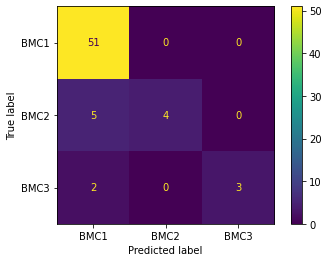

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_bacterien, y_pred_bacterien_under)
cmd = ConfusionMatrixDisplay(cm, display_labels=['BMC1','BMC2','BMC3'])
cmd.plot()

# RandomForestClassifier with TSNE

In [67]:
from sklearn.manifold import TSNE

# Initialize t-SNE object
tsne = TSNE(n_components=3, random_state=0)

# Fit and transform the data
X_bacterien_tsne = tsne.fit_transform(X_bacterien_scaled)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [68]:
# Split data into training and test sets
X_train_bacterien_tsne, X_test_bacterien_tsne, y_train_bacterien_tsne, y_test_bacterien_tsne = train_test_split(X_bacterien_tsne, y_bacterien)

# Initialize and train the classifier
clf_bacterien_tsne = RandomForestClassifier(random_state=0)
clf_bacterien_tsne.fit(X_train_bacterien_tsne, y_train_bacterien_tsne)

# Evaluate the classifier on the test set
accuracy = clf_bacterien_tsne.score(X_test_bacterien_tsne, y_test_bacterien_tsne)
print("Accuracy:", accuracy)

Accuracy: 0.7538461538461538


# NEURAL NETWORKS

In [80]:
# Convert labels to one-hot encoded

y_train_bacterien_neurones = to_categorical(y_train_bacterien)
y_test_bacterien_neurones = to_categorical(y_test_bacterien)

# Initializing the Neural Network
model = tf.keras.models.Sequential()

# Layers
model.add(tf.keras.layers.Dense(194, input_shape=(102,), activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.summary()

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 194)               19982     
                                                                 
 dense_5 (Dense)             (None, 6)                 1170      
                                                                 
Total params: 21,152
Trainable params: 21,152
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Creating MLP Neural Network
MLPmodel = MLPClassifier(solver='lbfgs',
                         alpha=1e-5,
                         hidden_layer_sizes=(50,),
                         random_state=1)

In [82]:
# Fit the model

hist = model.fit(X_train_bacterien, y_train_bacterien_neurones,
                 validation_split=0.2, epochs=350) 

Epoch 1/350
5/5 [==============================] - 1s 43ms/step - loss: 1.3390 - accuracy: 0.6516 - val_loss: 1.0187 - val_accuracy: 0.7436
Epoch 2/350
5/5 [==============================] - 0s 10ms/step - loss: 0.8159 - accuracy: 0.8065 - val_loss: 0.9114 - val_accuracy: 0.7436
Epoch 3/350
5/5 [==============================] - 0s 15ms/step - loss: 0.7563 - accuracy: 0.8065 - val_loss: 0.9178 - val_accuracy: 0.7436
Epoch 4/350
5/5 [==============================] - 0s 10ms/step - loss: 0.7296 - accuracy: 0.8065 - val_loss: 0.8533 - val_accuracy: 0.7436
Epoch 5/350
5/5 [==============================] - 0s 16ms/step - loss: 0.6764 - accuracy: 0.8065 - val_loss: 0.7770 - val_accuracy: 0.7436
Epoch 6/350
5/5 [==============================] - 0s 10ms/step - loss: 0.6446 - accuracy: 0.8065 - val_loss: 0.7334 - val_accuracy: 0.7436
Epoch 7/350
5/5 [==============================] - 0s 12ms/step - loss: 0.6383 - accuracy: 0.8065 - val_loss: 0.7249 - val_accuracy: 0.7436
Epoch 8/350
5/5 [===

5/5 [==============================] - 0s 7ms/step - loss: 0.5083 - accuracy: 0.8129 - val_loss: 0.7742 - val_accuracy: 0.7436
Epoch 60/350
5/5 [==============================] - 0s 7ms/step - loss: 0.5091 - accuracy: 0.8129 - val_loss: 0.7723 - val_accuracy: 0.7436
Epoch 61/350
5/5 [==============================] - 0s 7ms/step - loss: 0.5136 - accuracy: 0.8129 - val_loss: 0.7615 - val_accuracy: 0.7436
Epoch 62/350
5/5 [==============================] - 0s 7ms/step - loss: 0.5036 - accuracy: 0.8129 - val_loss: 0.7721 - val_accuracy: 0.7436
Epoch 63/350
5/5 [==============================] - 0s 7ms/step - loss: 0.5063 - accuracy: 0.8129 - val_loss: 0.7665 - val_accuracy: 0.7179
Epoch 64/350
5/5 [==============================] - 0s 7ms/step - loss: 0.5018 - accuracy: 0.8194 - val_loss: 0.7838 - val_accuracy: 0.7179
Epoch 65/350
5/5 [==============================] - 0s 7ms/step - loss: 0.4951 - accuracy: 0.8129 - val_loss: 0.7810 - val_accuracy: 0.7436
Epoch 66/350
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.3999 - accuracy: 0.8581 - val_loss: 0.8667 - val_accuracy: 0.7179
Epoch 118/350
5/5 [==============================] - 0s 10ms/step - loss: 0.3968 - accuracy: 0.8516 - val_loss: 0.8710 - val_accuracy: 0.7179
Epoch 119/350
5/5 [==============================] - 0s 8ms/step - loss: 0.3936 - accuracy: 0.8581 - val_loss: 0.8420 - val_accuracy: 0.7179
Epoch 120/350
5/5 [==============================] - 0s 9ms/step - loss: 0.3933 - accuracy: 0.8516 - val_loss: 0.8550 - val_accuracy: 0.7179
Epoch 121/350
5/5 [==============================] - 0s 8ms/step - loss: 0.3895 - accuracy: 0.8581 - val_loss: 0.8793 - val_accuracy: 0.7179
Epoch 122/350
5/5 [==============================] - 0s 9ms/step - loss: 0.3908 - accuracy: 0.8516 - val_loss: 0.8737 - val_accuracy: 0.7179
Epoch 123/350
5/5 [==============================] - 0s 9ms/step - loss: 0.3867 - accuracy: 0.8581 - val_loss: 0.8897 - val_accuracy: 0.7179
Epoch 124/350
5/5 [=======

5/5 [==============================] - 0s 9ms/step - loss: 0.3127 - accuracy: 0.8903 - val_loss: 0.9624 - val_accuracy: 0.6923
Epoch 176/350
5/5 [==============================] - 0s 10ms/step - loss: 0.3090 - accuracy: 0.8710 - val_loss: 0.9590 - val_accuracy: 0.6923
Epoch 177/350
5/5 [==============================] - 0s 9ms/step - loss: 0.3103 - accuracy: 0.8774 - val_loss: 0.9458 - val_accuracy: 0.6923
Epoch 178/350
5/5 [==============================] - 0s 9ms/step - loss: 0.3073 - accuracy: 0.8903 - val_loss: 0.9714 - val_accuracy: 0.6923
Epoch 179/350
5/5 [==============================] - 0s 9ms/step - loss: 0.3084 - accuracy: 0.8774 - val_loss: 0.9686 - val_accuracy: 0.6667
Epoch 180/350
5/5 [==============================] - 0s 8ms/step - loss: 0.3031 - accuracy: 0.8774 - val_loss: 0.9515 - val_accuracy: 0.6667
Epoch 181/350
5/5 [==============================] - 0s 9ms/step - loss: 0.3068 - accuracy: 0.8839 - val_loss: 0.9635 - val_accuracy: 0.6923
Epoch 182/350
5/5 [=======

5/5 [==============================] - 0s 8ms/step - loss: 0.2485 - accuracy: 0.9161 - val_loss: 1.0718 - val_accuracy: 0.6667
Epoch 234/350
5/5 [==============================] - 0s 7ms/step - loss: 0.2432 - accuracy: 0.9097 - val_loss: 1.0158 - val_accuracy: 0.6667
Epoch 235/350
5/5 [==============================] - 0s 7ms/step - loss: 0.2467 - accuracy: 0.9161 - val_loss: 1.0133 - val_accuracy: 0.6667
Epoch 236/350
5/5 [==============================] - 0s 8ms/step - loss: 0.2429 - accuracy: 0.9226 - val_loss: 1.0770 - val_accuracy: 0.6667
Epoch 237/350
5/5 [==============================] - 0s 8ms/step - loss: 0.2426 - accuracy: 0.9097 - val_loss: 1.0649 - val_accuracy: 0.6667
Epoch 238/350
5/5 [==============================] - 0s 8ms/step - loss: 0.2416 - accuracy: 0.9226 - val_loss: 1.0392 - val_accuracy: 0.6667
Epoch 239/350
5/5 [==============================] - 0s 8ms/step - loss: 0.2449 - accuracy: 0.9161 - val_loss: 1.0659 - val_accuracy: 0.6667
Epoch 240/350
5/5 [========

5/5 [==============================] - 0s 8ms/step - loss: 0.1996 - accuracy: 0.9290 - val_loss: 1.1633 - val_accuracy: 0.6667
Epoch 292/350
5/5 [==============================] - 0s 9ms/step - loss: 0.2013 - accuracy: 0.9355 - val_loss: 1.0835 - val_accuracy: 0.6667
Epoch 293/350
5/5 [==============================] - 0s 7ms/step - loss: 0.1930 - accuracy: 0.9290 - val_loss: 1.1844 - val_accuracy: 0.6667
Epoch 294/350
5/5 [==============================] - 0s 7ms/step - loss: 0.2012 - accuracy: 0.9290 - val_loss: 1.1460 - val_accuracy: 0.6667
Epoch 295/350
5/5 [==============================] - 0s 8ms/step - loss: 0.1911 - accuracy: 0.9355 - val_loss: 1.1433 - val_accuracy: 0.6667
Epoch 296/350
5/5 [==============================] - 0s 7ms/step - loss: 0.1913 - accuracy: 0.9419 - val_loss: 1.1331 - val_accuracy: 0.6667
Epoch 297/350
5/5 [==============================] - 0s 7ms/step - loss: 0.1907 - accuracy: 0.9355 - val_loss: 1.1531 - val_accuracy: 0.6667
Epoch 298/350
5/5 [========

5/5 [==============================] - 0s 9ms/step - loss: 0.1568 - accuracy: 0.9613 - val_loss: 1.2258 - val_accuracy: 0.6667
Epoch 350/350
5/5 [==============================] - 0s 9ms/step - loss: 0.1564 - accuracy: 0.9548 - val_loss: 1.2335 - val_accuracy: 0.6667


In [95]:
# Fit
MLPmodel.fit(X_train_bacterien, y_train_bacterien)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), random_state=1,
              solver='lbfgs')

In [96]:
# Predict
predict = np.ravel(model.predict(X_test_bacterien))
y_pred_neurones =[]
for i in predict:  
    b = int(i)
    y_pred_neurones.append(b)

3/3 [==============================] - 0s 2ms/step


In [97]:
# Predict
MLPpredict = MLPmodel.predict(X_test_bacterien)

In [98]:
accuracy_bacterien = accuracy_score(np.ravel(y_test_bacterien_neurones), y_pred_neurones)
print("Accuracy :", accuracy_bacterien)
accuracy_bacterien = accuracy_score(y_test_bacterien, MLPpredict)
print("Accuracy :", accuracy_bacterien)

Accuracy : 0.8333333333333334
Accuracy : 0.6923076923076923


In [100]:
y_pred_neurones = [i+3 for i in y_pred_neurones]
#print(y_pred_neurones)

[]

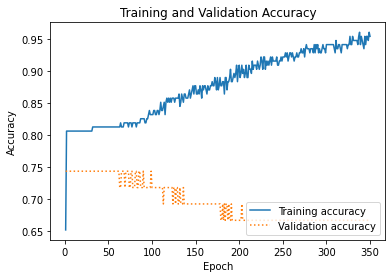

In [101]:
# Plot accuracy evolution during training
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Other models:

In [16]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_bacterien = RandomForestClassifier(random_state=0)

# Hyperparamètres à ajuster
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10]}

# Utiliser la validation croisée pour ajuster les hyperparamètres
grid_search = GridSearchCV(clf_bacterien, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_bacterien, y_train_bacterien)

# Prédire les labels de l'ensemble de test et calculer l'accuracy
y_pred_bacterien = grid_search.predict(X_test_bacterien)
accuracy_bacterien = accuracy_score(y_test_bacterien, y_pred_bacterien)
print("Accuracy :", accuracy_bacterien)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Afficher la précision moyenne sur la validation croisée
print("Précision moyenne sur la validation croisée :", grid_search.best_score_)
"""

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\nclf_bacterien = RandomForestClassifier(random_state=0)\n\n# Hyperparamètres à ajuster\nparam_grid = {\'n_estimators\': [10, 50, 100],\n              \'max_depth\': [None, 5, 10]}\n\n# Utiliser la validation croisée pour ajuster les hyperparamètres\ngrid_search = GridSearchCV(clf_bacterien, param_grid=param_grid, cv=5, n_jobs=-1)\ngrid_search.fit(X_train_bacterien, y_train_bacterien)\n\n# Prédire les labels de l\'ensemble de test et calculer l\'accuracy\ny_pred_bacterien = grid_search.predict(X_test_bacterien)\naccuracy_bacterien = accuracy_score(y_test_bacterien, y_pred_bacterien)\nprint("Accuracy :", accuracy_bacterien)\n\n# Afficher les meilleurs hyperparamètres\nprint("Meilleurs hyperparamètres :", grid_search.best_params_)\n\n# Afficher la précision moyenne sur la validation croisée\nprint("Précision moyenne sur la validation croisée :", grid_search.best_score_)\n'